../data_for_gan/input/4.jpg
(892, 1280)


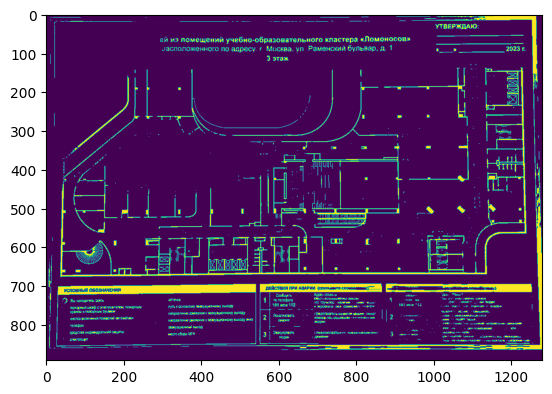

../data_for_gan/input/2.jpg
(819, 1064)


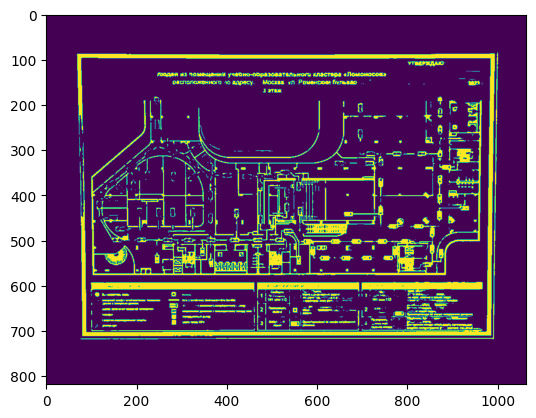

../data_for_gan/input/3.jpg
(847, 1200)


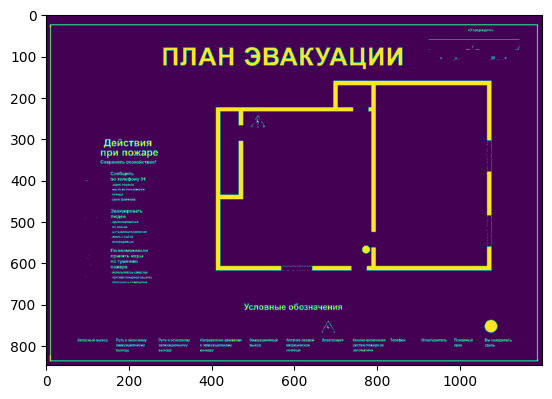

../data_for_gan/input/1.jpg
(1238, 1752)


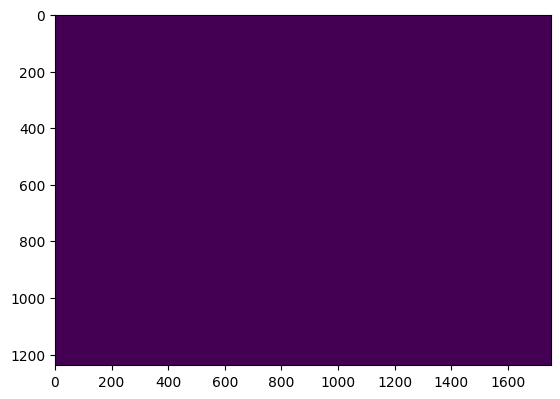

../data_for_gan/input/6.jpg
(976, 1280)


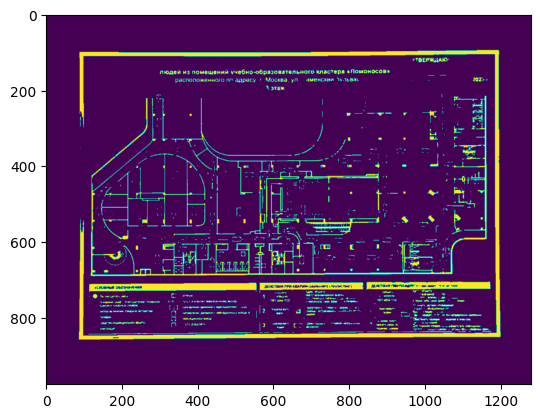

In [247]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

folder_path = '../data_for_gan/input'  # Замените на путь к вашей папке

for root, dirs, files in os.walk(folder_path):
    for file in files:
        file_path = os.path.join(root, file)
        image = cv2.imread(file_path)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        min_values = np.min(img, axis=2)
        max_values = np.max(img, axis=2)

        # Вычисляем разницу между максимальным и минимальным значениями
        channel_diff = max_values - min_values

        # Создаем новую матрицу, заполненную нулями, размерности (N, M)
        result_matrix = np.zeros_like(min_values, dtype=np.uint8)

        # Устанавливаем значение 1 в пикселях, где разница < 20 в каждом канале
        # и при этом значение в третьем канале (оси 2) <= 128
        # Устанавливаем значение 1 в пикселях, где выполняется одно из двух условий
        result_matrix[np.logical_or(max_values <= 25, (max_values <= 110) & (channel_diff < 20))] = 1

        plt.imshow(result_matrix)
        print(file_path)
        print(result_matrix.shape)
        plt.show()

# Примените пороговую фильтрацию
# В данном случае, мы используем метод OTSU для автоматического выбора порога

# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [309]:
exit = (759, 618)

../data_for_gan/input/3.jpg
(847, 1200)


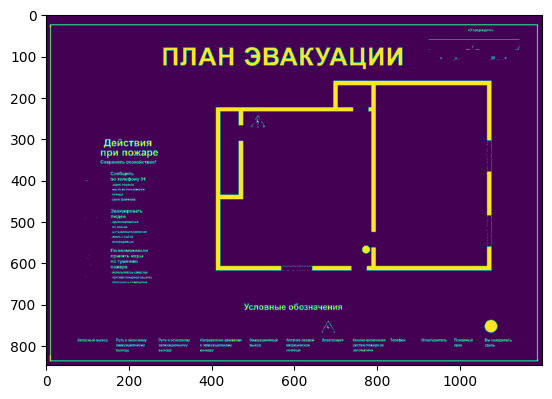

In [310]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

file_path = '../data_for_gan/input/3.jpg'
image = cv2.imread(file_path)
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
min_values = np.min(img, axis=2)
max_values = np.max(img, axis=2)

# Вычисляем разницу между максимальным и минимальным значениями
channel_diff = max_values - min_values

# Создаем новую матрицу, заполненную нулями, размерности (N, M)
result_matrix = np.zeros_like(min_values, dtype=np.uint8)

# Устанавливаем значение 1 в пикселях, где разница < 20 в каждом канале
# и при этом значение в третьем канале (оси 2) <= 128
# Устанавливаем значение 1 в пикселях, где выполняется одно из двух условий
result_matrix[np.logical_or(max_values <= 25, (max_values <= 110) & (channel_diff < 20))] = 1

plt.imshow(result_matrix)
print(file_path)
print(result_matrix.shape)
plt.show()

In [328]:
x, y = 1, 1
matrix = np.array([ [1, 1, 1, 1, 1, 1, 1,-1,-1, 1],
                    [1, 0, 0, 0, 0, 0, 0, 0, 0,1],
                    [1,49,49,49,49, 0, 0, 0, 0, 1],
                    [1, 0, 0, 0, 0,49, 1, 1, 1, 1],
                    [1, 0, 0,49, 0, 0, 0, 0, 0, 1],
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])
best_vis = [[], matrix.shape[0]*matrix.shape[1]+1]
matrix[matrix[:, :] == 49] = matrix.shape[0]*matrix.shape[1]+1
matrix[matrix[:, :] == -49] = -(matrix.shape[0]*matrix.shape[1]+1)
def dp_search(i, j, road=[], count=0):
    global matrix
    global best_vis
    if ((i, j) in road):
        return
    road += [(i, j)]
    if ((matrix[i][j] == -matrix.shape[0]*matrix.shape[1]-1) and (count < best_vis[1])):
        best_vis = [road, count]
        return
    if (i-1 >= 0):
        dp_search(i-1, j, road, count+1)
        if (j-1 >= 0):
            dp_search(i-1, j-1, road, count+1)
        if (j+1 < matrix.shape[1]):
            dp_search(i-1, j+1, road, count+1)
    if (i+1 < matrix.shape[0]):
        dp_search(i+1, j, road, count+1)
        if (j-1 >= 0):
            dp_search(i+1, j-1, road, count+1)
        if (j+1 < matrix.shape[1]):
            dp_search(i+1, j+1, road, count+1)
    if (j-1 >= 0):
        dp_search(i, j-1, road, count+1)
    if (j+1 < matrix.shape[1]):
        dp_search(i, j+1, road, count+1)

In [329]:
dp_search(x, y)
best_vis

[[(1, 1),
  (0, 1),
  (1, 0),
  (0, 0),
  (2, 0),
  (3, 0),
  (2, 1),
  (1, 2),
  (0, 2),
  (1, 3),
  (0, 3),
  (1, 4),
  (0, 4),
  (1, 5),
  (0, 5),
  (1, 6),
  (0, 6),
  (1, 7),
  (0, 7),
  (0, 8),
  (1, 8),
  (0, 9),
  (1, 9),
  (2, 9),
  (3, 9),
  (2, 8),
  (3, 8),
  (2, 7),
  (3, 7),
  (2, 6),
  (3, 6),
  (2, 5),
  (3, 5),
  (2, 4),
  (3, 4),
  (2, 3),
  (3, 3),
  (2, 2),
  (3, 2),
  (4, 2),
  (3, 1),
  (4, 1),
  (5, 1),
  (4, 0),
  (5, 0),
  (5, 2),
  (4, 3),
  (5, 3),
  (4, 4),
  (5, 4),
  (4, 5),
  (5, 5),
  (4, 6),
  (5, 6),
  (4, 7),
  (5, 7),
  (4, 8),
  (5, 8),
  (4, 9),
  (5, 9)],
 17]

In [311]:
matrix = result_matrix.astype(np.int64)
matrix[matrix[:, :] == 1] = matrix.shape[0]*matrix.shape[1]+1
matrix[exit[0]][exit[1]] = -matrix.shape[0]*matrix.shape[1]-1
best_vis = [[], matrix.shape[0]*matrix.shape[1]+1]
def dp_search(i, j, road=[], count=0):
    global matrix
    global best_vis
    if ((i, j) in road):
        return
    road += [(i, j)]
    if ((matrix[i][j] == -matrix.shape[0]*matrix.shape[1]-1) and (count < best_vis[1])):
        best_vis = [road, count]
        return
    if (i-1 >= 0):
        dp_search(i-1, j, road, count+1)
        if (j-1 >= 0):
            dp_search(i-1, j-1, road, count+np.sqrt(2))
        if (j+1 < matrix.shape[1]):
            dp_search(i-1, j+1, road, count+np.sqrt(2))
    if (i+1 < matrix.shape[0]):
        dp_search(i+1, j, road, count+1)
        if (j-1 >= 0):
            dp_search(i+1, j-1, road, count+np.sqrt(2))
        if (j+1 < matrix.shape[1]):
            dp_search(i+1, j+1, road, count+np.sqrt(2))
    if (j-1 >= 0):
        dp_search(i, j-1, road, count+1)
    if (j+1 < matrix.shape[1]):
        dp_search(i, j+1, road, count+1)